<a id='top'><img src='src/top.webp' style='float:center; width:1000px;'></a>

# <center>[Intro to AI] HW2</center>
## <div class="pull-right">2017025769 신선웅</div>

## Background
<br>
<div>
We want to confirm the theory behind the bias-variance decomposition with an empirical experiment that measures the bias and variance for polynomial models.
In our experiment, we will reuse python codes in HW1 and repeatedly fit our hypothesis model to a random training set. We then find the expectation and variance of the fitted models generated from these training sets.
</div>

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Assignment</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#setting" role="tab" aria-controls="profile">Setting<span class="badge badge-primary badge-pill">0</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#repeat" role="tab" aria-controls="profile">Repeat the following steps<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#100" role="tab" aria-controls="messages">100 Times<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#bar" role="tab" aria-controls="settings">Make a bar plot<span class="badge badge-primary badge-pill">3</span></a>

# <a id='setting'>0. Setting</a>

### 📚Libraries for HW2

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use(['seaborn-notebook'])
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# <a id='repeat'>1. Repeat</a>

> Repeat the following steps by changing the polynomial degree from 0 to 9.

# <a id='100'>2. 100 Times</a>

### 2.1 **Make a training data $x_{train}$**, which is evenly spaced 21 numbers over $[-\pi, \pi]$, and <br>$y_{train} = f(x_{train}) + \epsilon$ where $\epsilon$ ~ $N(0, 0.5^2)$ is i.i.d. samples from Gaussian distribution.

In [2]:
e_21= np.random.normal(0, 0.5, 21)
e_21

array([ 0.68366977, -0.43200758, -0.2638464 , -0.83547145,  0.23957136,
        0.17439453,  0.31133837, -0.07489633, -0.43377771, -0.49277153,
        0.15024806,  0.14527157, -0.01638167,  0.81615931, -0.30687491,
       -0.09990715, -0.53508988,  0.15673076,  0.25035855, -0.45292114,
       -0.10788232])

In [3]:
x_train = np.linspace(-np.pi, np.pi, 21)
x_train

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339,
        3.14159265])

In [4]:
y_train = np.sin(x_train) + e_21
y_train

array([ 0.68366977, -0.74102458, -0.85163165, -1.64448845, -0.71148516,
       -0.82560547, -0.63971815, -0.88391332, -1.02156296, -0.80178852,
        0.15024806,  0.45428857,  0.57140358,  1.62517631,  0.6441816 ,
        0.90009285,  0.41596664,  0.96574775,  0.8381438 , -0.14390415,
       -0.10788232])

### 2.2 Fit $d$-th order polynomial to the training data <br>and estimate the optimal model parameters/coefficients $w^*$

<img src='src/eq1.png' style='float:left; width:500px;'>

In [5]:
params = np.arange(0, 10) # create d
optimal_model_params_total = [] #store w
for d in params:
    pr = LinearRegression()
    co = PolynomialFeatures(degree=d)
    x_train_co = co.fit_transform(x_train[:, np.newaxis])
    pr.fit(x_train_co, y_train)
    optimal_model_params_total.append(pr.coef_)

In [6]:
w_total = pd.DataFrame(optimal_model_params_total, 
             index=['degree='+str(i) for i in range(0,10)],
             columns=['row'+str(i) for i in range(1, 11)]).T
w_total

,degree=0,degree=1,degree=2,degree=3,degree=4,degree=5,degree=6,degree=7,degree=8,degree=9
row1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
row2,NaN,0.255254,0.255254,0.939600,0.939600,0.931126,0.931126,1.356426,1.356426,2.031339
row3,NaN,NaN,-0.005053,-0.005053,-0.103354,-0.103354,0.184366,0.184366,0.179929,0.179929
row4,NaN,NaN,NaN,-0.105378,-0.105378,-0.101673,-0.101673,-0.467860,-0.467860,-1.442642
row5,NaN,NaN,NaN,NaN,0.010644,0.010644,-0.070861,-0.070861,-0.068499,-0.068499
row6,NaN,NaN,NaN,NaN,NaN,-0.000311,-0.000311,0.076490,0.076490,0.449396
row7,NaN,NaN,NaN,NaN,NaN,NaN,0.005625,0.005625,0.005230,0.005230
row8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004516,-0.004516,-0.056556
row9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000020,0.000020
row10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002390


### 2.3 Repeat [steps 2-1, 2-2] 100 times to obtain 100 different model parameters {$w_{i}$}$_{i=1:100}$ <br> and model predictions {$\hat y_{train, i}$}$_{i=1:100}$.

In [7]:
params = np.arange(0, 10) # create d
optimal_model_params_total = [] #store w
y_train_pred_total = [] #store y_train_pred
for i in params:
    optimal_model_params_subtotal = []
    y_train_pred_subtotal = []
    for j in range(100):
        e_21= np.random.normal(0, 0.5, 21)
        x_train = np.linspace(-np.pi, np.pi, 21)
        y_train = np.sin(x_train) + e_21
        pr = LinearRegression()
        co = PolynomialFeatures(degree=i)
        x_train_co = co.fit_transform(x_train[:, np.newaxis])
        pr.fit(x_train_co, y_train)
        optimal_model_params_subtotal.append(pr.coef_)
        y_train_pred = pr.predict(x_train_co)
        y_train_pred_subtotal.append(y_train_pred)
    optimal_model_params_total.append(optimal_model_params_subtotal)
    y_train_pred_total.append(y_train_pred_subtotal)

### 2.4 Compute the sample mean $\mu$ and standard deviation $\sigma$ of {$\hat y_{train, i}$}$_{i=1:100}$<br>Note that $\mu$ and $\sigma$ is a vector of length 21. Use `np.mean` & `np.std`

In [8]:
mean_total = []
std_total = []
for i in params:
    mean = []
    std = []
    for j in range(21):
        mean.append(np.array(y_train_pred_total)[i, :, j].mean())
        std.append(np.array(y_train_pred_total)[i, :, j].std())
    mean_total.append(mean)
    std_total.append(std)

In [9]:
pd.DataFrame(mean_total, index=['d'+str(i) for i in range(0, 10)]).T

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
0,-0.001439,-0.815807,-0.798528,0.074800,0.165970,-0.034670,-0.173156,-0.016109,-0.066203,-0.040085
1,-0.001439,-0.733305,-0.722900,-0.383235,-0.331266,-0.344220,-0.349892,-0.269811,-0.271463,-0.240733
2,-0.001439,-0.650803,-0.646520,-0.698019,-0.677866,-0.626429,-0.594314,-0.529090,-0.587675,-0.591480
3,-0.001439,-0.568301,-0.569388,-0.885540,-0.890686,-0.844205,-0.818286,-0.758153,-0.845803,-0.841382
4,-0.001439,-0.485799,-0.491503,-0.961788,-0.986533,-0.974746,-0.967905,-0.922093,-0.991071,-0.965544
5,-0.001439,-0.403297,-0.412867,-0.942753,-0.982162,-1.007739,-1.016530,-0.994513,-1.020733,-0.993724
6,-0.001439,-0.320794,-0.333477,-0.844424,-0.894279,-0.943550,-0.958493,-0.961847,-0.949506,-0.945173
7,-0.001439,-0.238292,-0.253336,-0.682791,-0.739538,-0.791423,-0.803475,-0.824883,-0.794098,-0.820301
8,-0.001439,-0.155790,-0.172442,-0.473844,-0.534543,-0.567675,-0.571559,-0.598029,-0.569637,-0.615152
9,-0.001439,-0.073288,-0.090796,-0.233571,-0.295848,-0.293889,-0.288956,-0.306829,-0.292132,-0.337619


In [10]:
pd.DataFrame(std_total, index=['d'+str(i) for i in range(0, 10)]).T

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
0,0.106061,0.216400,0.302999,0.338894,0.373434,0.432175,0.487665,0.553462,0.508556,0.513532
1,0.106061,0.201489,0.241400,0.255650,0.224807,0.251283,0.297902,0.333039,0.366051,0.451702
2,0.106061,0.187153,0.192884,0.223029,0.212916,0.307371,0.322801,0.297980,0.289839,0.326015
3,0.106061,0.173535,0.160227,0.219733,0.232020,0.306543,0.292950,0.290555,0.302465,0.320415
4,0.106061,0.160817,0.145224,0.222987,0.234421,0.267242,0.265964,0.297841,0.292806,0.292943
5,0.106061,0.149230,0.145628,0.221116,0.221421,0.236738,0.251299,0.268332,0.266890,0.278383
6,0.106061,0.139057,0.155293,0.211311,0.205148,0.232395,0.235090,0.229114,0.254311,0.262544
7,0.106061,0.130628,0.168061,0.195424,0.196099,0.237932,0.224270,0.212782,0.237930,0.277028
8,0.106061,0.124299,0.179895,0.177872,0.196857,0.236532,0.230789,0.206768,0.238836,0.290429
9,0.106061,0.120402,0.188621,0.164429,0.202190,0.227348,0.244497,0.199703,0.270799,0.257702


### 2.5 Compute $bias^2 = (\mu - y_{true})^2$and $variance = \sigma^2$<br> Note that $bias^2$ and $variance$ is a vector of length 21.

In [11]:
y_true = np.full_like(np.array(mean_total), np.sin(x_train))

In [12]:
bias_squared = np.square(mean_total - y_true)
pd.DataFrame(bias_squared, index=['d'+str(i) for i in range(0, 10)]).T

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
0,0.000002,0.665542,0.637646,0.005595,0.027546,0.001202,0.029983,0.000260,4.382878e-03,0.001607
1,0.094604,0.180020,0.171299,0.005508,0.000495,0.001239,0.001671,0.001537,1.410339e-03,0.004663
2,0.343802,0.003971,0.003450,0.012151,0.008115,0.001493,0.000043,0.003445,1.210691e-08,0.000014
3,0.652183,0.057944,0.057422,0.005856,0.006670,0.001238,0.000086,0.002587,1.353220e-03,0.001047
4,0.901774,0.216465,0.211189,0.000115,0.001259,0.000561,0.000284,0.000839,1.601146e-03,0.000210
5,0.997124,0.356055,0.344726,0.003277,0.000318,0.000060,0.000273,0.000030,4.298696e-04,0.000039
6,0.901774,0.397230,0.381404,0.011370,0.003224,0.000056,0.000055,0.000116,2.403965e-06,0.000035
7,0.652183,0.325727,0.308781,0.015933,0.004827,0.000310,0.000031,0.000252,2.225788e-04,0.000127
8,0.343802,0.186620,0.172510,0.012983,0.002835,0.000404,0.000263,0.000105,3.293552e-04,0.000749
9,0.094604,0.055568,0.047620,0.005692,0.000173,0.000229,0.000402,0.000005,2.851146e-04,0.000818


In [13]:
variance = np.square(std_total)
pd.DataFrame(variance, index=['d'+str(i) for i in range(0, 10)]).T

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
0,0.011249,0.046829,0.091809,0.114849,0.139453,0.186775,0.237817,0.306320,0.258630,0.263715
1,0.011249,0.040598,0.058274,0.065357,0.050538,0.063143,0.088746,0.110915,0.133993,0.204035
2,0.011249,0.035026,0.037204,0.049742,0.045333,0.094477,0.104200,0.088792,0.084007,0.106286
3,0.011249,0.030114,0.025673,0.048283,0.053833,0.093968,0.085820,0.084422,0.091485,0.102666
4,0.011249,0.025862,0.021090,0.049723,0.054953,0.071418,0.070737,0.088709,0.085735,0.085815
5,0.011249,0.022270,0.021208,0.048892,0.049027,0.056045,0.063151,0.072002,0.071230,0.077497
6,0.011249,0.019337,0.024116,0.044653,0.042086,0.054007,0.055267,0.052493,0.064674,0.068929
7,0.011249,0.017064,0.028244,0.038190,0.038455,0.056612,0.050297,0.045276,0.056611,0.076744
8,0.011249,0.015450,0.032362,0.031639,0.038753,0.055947,0.053264,0.042753,0.057043,0.084349
9,0.011249,0.014497,0.035578,0.027037,0.040881,0.051687,0.059779,0.039881,0.073332,0.066410


### 2.6 Make a subplot of the true model and 100 model predictions as follows:

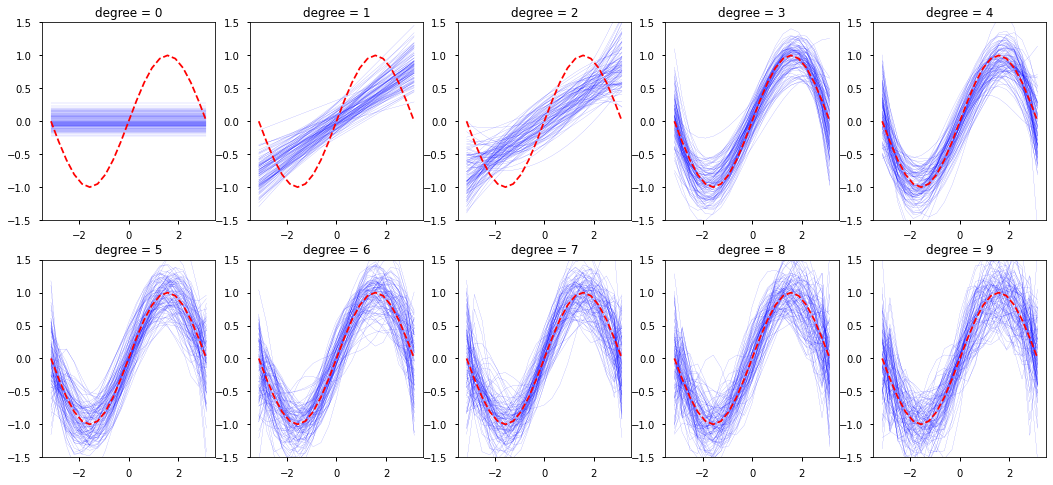

In [14]:
fig = plt.figure(figsize=(18, 8)) 
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=5, # col 몇 개 
                       height_ratios=[1]*2, 
                       width_ratios=[1]*5)

for d in params:
    ax = plt.subplot(gs[d], title='degree = '+str(d))
    for i in range(100):
        ax.plot(x_train, np.array(y_train_pred_total)[d, i, :], 'b-', linewidth=0.1)
    ax.plot(x_train, np.sin(x_train), 'r--')
    ax.axis([-3.5, 3.5, -1.5, 1.5])

plt.show()

### 2.7 Make a subplot of the true model and as follows. Use ` fill_between`  to fill the area between $\mu ± \sigma$

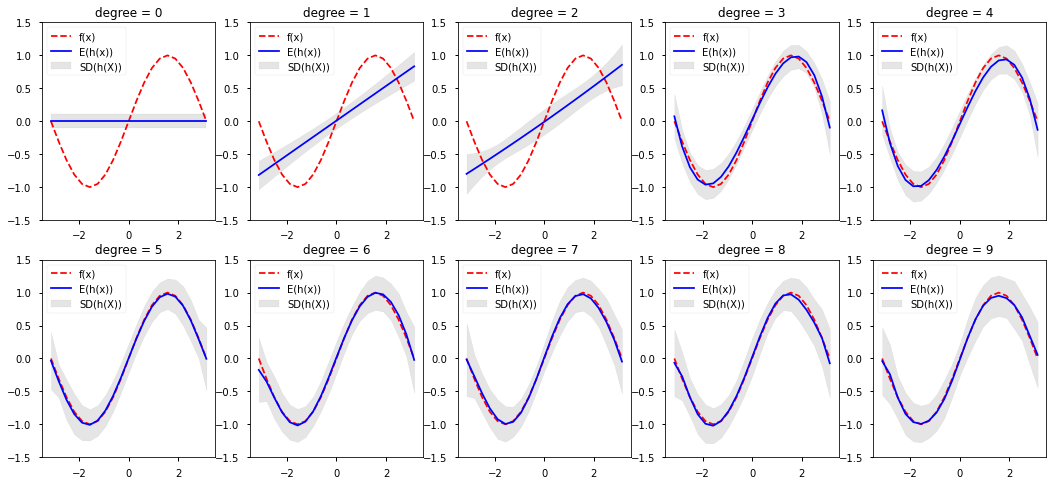

In [15]:
fig = plt.figure(figsize=(18, 8)) 
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=5, # col 몇 개 
                       height_ratios=[1]*2, 
                       width_ratios=[1]*5)

for d in params:
    ax = plt.subplot(gs[d], title='degree = '+str(d))
    ax.plot(x_train, np.sin(x_train), 'r--', label='f(x)')
    ax.plot(x_train, np.array(mean_total[d]), 'b-', label='E(h(x))')
    ax.fill_between(x_train, np.array(mean_total[d])-np.array(std_total[d]), 
                    np.array(mean_total[d])+np.array(std_total[d]), color='gray', alpha=0.2, label='SD(h(X))')
    ax.axis([-3.5, 3.5, -1.5, 1.5])
    ax.legend()

plt.show()

# <a id='bar'>3. Make a bar plot </a>

- Make a bar plot (use `bar`) that takes an average of $bias^2$and $variance$ over all values of $x_{train}$,<br> together with the sum of two.

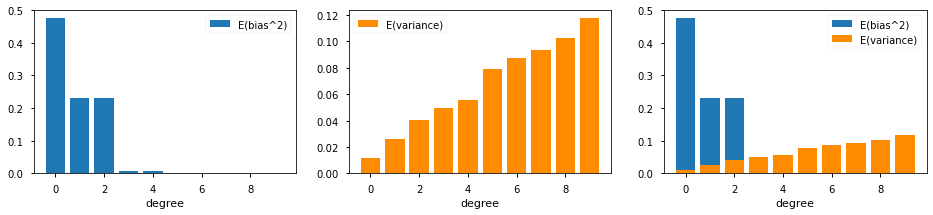

In [16]:
fig = plt.figure(figsize=(16, 3)) 
gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=3, # col 몇 개 
                       height_ratios=[1], 
                       width_ratios=[1]*3)
plt.subplot(gs[0])
plt.bar(params, bias_squared.mean(axis=1), label='E(bias^2)')
plt.xlabel('degree')
plt.legend()
plt.subplot(gs[1])
plt.bar(params, variance.mean(axis=1), color='darkorange', label='E(variance)')
plt.xlabel('degree')
plt.legend()
plt.subplot(gs[2])
plt.bar(params, bias_squared.mean(axis=1), label='E(bias^2)')
plt.bar(params, variance.mean(axis=1), color='darkorange', label='E(variance)')
plt.xlabel('degree')
plt.legend()
plt.show()

<center><a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Move to TOP</a><center>